<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


Using TensorFlow backend.
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

<h2>Columns Name for our testing and training data </h2>

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

<h2> Training Dataset </h2>

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn", header=None, names=features)

C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2> Data Exploration</h2>

In [4]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
awid.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,1795575.0,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0,1795575.0,...,1.795575e+06,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0
mean,0.0,0.0,1.393663e+09,2.004690e-03,2.004690e-03,1.870294e+03,5.153149e+02,5.153149e+02,0.0,0.0,...,2.513950e+01,0.0,1.272582e+00,8.499055e+00,3.748103e-04,1.271080e-01,2.325216e-02,1.772691e-03,4.932927e-01,0.0
std,0.0,0.0,8.674448e+02,6.379536e-03,6.379536e-03,8.674448e+02,6.649245e+02,6.649245e+02,0.0,0.0,...,2.373590e+01,0.0,8.198060e-01,4.173015e+00,1.935639e-02,3.330940e-01,1.507034e-01,4.206602e-02,4.999551e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393662e+09,3.150000e-04,3.150000e-04,1.027875e+03,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.490000e-04,5.490000e-04,1.902614e+03,1.120000e+02,1.120000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.0,0.0,1.393664e+09,1.113000e-03,1.113000e-03,2.524325e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393665e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [6]:
awid['class'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

In [7]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

<h2> Dropping columns with 50% of null data</h2>

In [8]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

<h2>Dropping all the null rows</h2>

In [9]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [10]:
awid.isna().sum()

frame.interface_id            0
frame.offset_shift            0
frame.time_epoch              0
frame.time_delta              0
frame.time_delta_displayed    0
                             ..
wlan.seq                      0
wlan.fcs_good                 0
wlan.wep.key                  0
data.len                      0
class                         0
Length: 85, dtype: int64

In [11]:
awid['class'].value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [12]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [13]:
awid.select_dtypes(['number']).head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60


<h2>Splitting the training data</h2>

In [14]:
X_train, y_train = awid.select_dtypes(['number']), awid['class']


In [15]:
y_train.value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Removing all the Constant of training data</h2>

In [16]:
zero_mean=X_train.columns[X_train.mean() <= 1]
X_train.drop(zero_mean, axis=1, inplace=True, errors='ignore')
X_train.shape

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(885744, 13)

In [17]:
X_train.describe()

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
count,8.857440e+05,885744.000000,885744.000000,885744.000000,885744.0,8.857440e+05,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000
mean,1.393663e+09,1804.671067,967.176877,967.176877,26.0,3.906253e+09,42.140876,2437.008022,1.999688,5.973751,60.130699,1909.654222,903.683868
std,8.321081e+02,832.108077,699.334423,699.334423,0.0,8.320998e+08,20.953351,0.535839,0.024962,3.479865,75.964734,1213.594220,698.842577
min,1.393661e+09,0.217518,65.000000,65.000000,26.0,2.101817e+09,1.000000,2412.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.393662e+09,961.030476,124.000000,124.000000,26.0,3.062621e+09,48.000000,2437.000000,2.000000,0.000000,44.000000,798.000000,60.000000
50%,1.393663e+09,1929.983103,1552.000000,1552.000000,26.0,4.031564e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,1862.000000,1488.000000
75%,1.393664e+09,2206.561865,1554.000000,1554.000000,26.0,4.308140e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,2957.000000,1490.000000
max,1.393665e+09,3599.425846,1570.000000,1570.000000,26.0,5.700990e+09,54.000000,2472.000000,2.000000,11.000000,314.000000,4095.000000,1508.000000


<h2>Testing Data</h2>

In [18]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/AWID-CLS-R-Tst", header=None, names=features)


C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Cleaning testing data</h2>

In [19]:
awid_test.isna().sum()
awid_test.replace({"?":None}, inplace=True)
test_null_column=awid_test.columns[awid_test.isnull().mean() >= 0.5]
awid_test.drop(test_null_column, axis=1, inplace=True)
awid_test.dropna(inplace=True)

for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')


X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']

zero_mean=X_test.columns[X_test.mean() <= 1]
X_test.drop(zero_mean, axis=1, inplace=True, errors='ignore')

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
X_test.describe()

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
count,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.0,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000
mean,1.393669e+09,419.131540,892.088681,892.088681,26.0,9.407048e+09,36.257678,2437.006544,1.999757,4.797611,80.225144,1849.670600,828.889611
std,3.968335e+02,396.833483,713.371196,713.371196,0.0,3.968294e+08,21.867087,0.563983,0.022027,3.920187,98.175003,1158.063441,712.901695
min,1.393668e+09,0.000000,65.000000,65.000000,26.0,8.987921e+09,1.000000,2412.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.393668e+09,74.256986,124.000000,124.000000,26.0,9.062177e+09,18.000000,2437.000000,2.000000,0.000000,44.000000,920.000000,60.000000
50%,1.393668e+09,255.078000,1552.000000,1552.000000,26.0,9.242996e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,1646.000000,1488.000000
75%,1.393669e+09,852.944268,1552.000000,1552.000000,26.0,9.840856e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,2812.000000,1488.000000
max,1.393669e+09,1200.289872,1570.000000,1570.000000,26.0,1.018820e+10,54.000000,2472.000000,2.000000,11.000000,314.000000,4095.000000,1508.000000


In [21]:
y_test.value_counts()

normal           277960
impersonation     18606
injection         16682
Name: class, dtype: int64

<h2>Preprocessing  </h2> 

In [22]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [23]:
X_train

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
17,1.393661e+09,0.217518,1524,1524,26,2101817362,54.0,2437,2,8,44,96,1460
18,1.393661e+09,0.218139,124,124,26,2101818213,54.0,2437,2,8,44,1217,60
20,1.393661e+09,0.229118,153,153,26,2101829175,54.0,2437,2,8,44,97,89
28,1.393661e+09,0.367359,124,124,26,2101967429,54.0,2437,2,8,44,1220,60
31,1.393661e+09,0.380933,124,124,26,2101981052,54.0,2437,2,8,44,99,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795504,1.393665e+09,3599.043342,112,112,26,5700607575,18.0,2437,2,8,48,2608,48
1795511,1.393665e+09,3599.086311,112,112,26,5700650521,18.0,2437,2,8,48,2609,48
1795551,1.393665e+09,3599.323495,1524,1524,26,5700887520,54.0,2437,2,8,44,0,1460
1795556,1.393665e+09,3599.375225,1523,1523,26,5700939250,54.0,2437,2,8,44,1,1459


In [24]:

print(X_train.dtypes)

frame.time_epoch         float64
frame.time_relative      float64
frame.len                  int64
frame.cap_len              int64
radiotap.length            int64
radiotap.mactime           int64
radiotap.datarate        float64
radiotap.channel.freq      int64
wlan.fc.type               int64
wlan.fc.subtype            int64
wlan.duration              int64
wlan.seq                   int64
data.len                   int64
dtype: object


In [25]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[-2.16853389 -2.16853389  0.79621912 ... -0.21234469 -1.49444948
   0.79605402]
 [-2.16853315 -2.16853315 -1.20568547 ... -0.21234469 -0.57074647
  -1.20725951]
 [-2.16851995 -2.16851995 -1.16421745 ... -0.21234469 -1.49362548
  -1.1657623 ]
 ...
 [ 2.15675522  2.15675522  0.79621912 ... -0.21234469 -1.57355339
   0.79605402]
 [ 2.15681739  2.15681739  0.79478919 ... -0.21234469 -1.57272939
   0.79462309]
 [ 2.15687822  2.15687823 -0.75382701 ... -0.21234469 -0.97285803
  -0.75508302]]
float64


<h2>Encoding the label data</h2>

In [26]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [27]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [28]:
encoded_y

array([2, 2, 2, ..., 2, 2, 2])

<h2>Classification Machine Learning Algorithm </h2>

In [29]:
def model_accuracy(model):
    y_preds=model.predict(X_test)
    return accuracy_score(y_test, y_preds)

In [30]:
#Doesnot perform well for multiclass classification Problem 
lr=LogisticRegression()
lr.fit(X_train, y_train)
model_accuracy(lr)

0.05939702727551333

<h2>Some of the Best Algorithm for Classification Problem </h2>

In [31]:
# Decision Tree Algorithm
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
model_accuracy(tree)

0.8816337215241598

In [32]:
#Random Forest Classifier 
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
model_accuracy(forest)

0.9303938093778731

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix


<h2>Finding the True Positive, False Positive Rate for the Labels </h2>

In [34]:
# when we are training the model with the labels outcomes of 'normal'
y_train_norm=(y_train == 'normal')

y_test_norm =(y_test =='normal')

In [35]:
forest.fit(X_train,y_train_norm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_cross_acc=cross_val_score(forest,X_train, y_train_norm, cv=10, scoring="accuracy")

In [37]:
y_cross_acc

array([0.99353091, 1.        , 1.        , 0.99906294, 1.        ,
       1.        , 1.        , 0.99880326, 0.68622846, 0.99975162])

In [38]:
y_preds_norm = cross_val_predict(forest, X_train,y_train_norm, cv=10)

In [39]:
y_preds_norm

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
confusion_matrix(y_train_norm, y_preds_norm)

array([[109414,    696],
       [ 27896, 747738]], dtype=int64)

In [41]:
#perfect precision and recall because both the value of prediction and actual are same
y_perfect_norm=y_train_norm

In [42]:
confusion_matrix(y_train_norm, y_perfect_norm)

array([[110110,      0],
       [     0, 775634]], dtype=int64)

In [43]:
# WE WILL PREDICT THE HOW MANY ARE LABELLED 'INJECTION' ATTACK USING RANDOM FOREST
y_train_inject=(y_train == 'injection')
forest.fit(X_train,y_train_inject)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_cross_inject=cross_val_score(forest,X_train, y_train_inject, cv=10, scoring="accuracy")

In [45]:
y_cross_inject

array([0.99682755, 1.        , 1.        , 0.99908552, 1.        ,
       0.99249215, 1.        , 1.        , 1.        , 0.99974033])

In [46]:
y_preds_inject = cross_val_predict(forest, X_train,y_train_inject, cv=5)

In [47]:
y_preds_inject

array([False, False, False, ..., False, False, False])

In [48]:
confusion_matrix(y_train_inject, y_preds_inject)

array([[817154,   3211],
       [  3566,  61813]], dtype=int64)

In [52]:
# Show TPR, FPR, TNR and TPR for the "Impersonation " attack using the Random Forest Algorithm
y_train_imperson=(y_train == 'impersonation')
forest.fit(X_train,y_train_imperson)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_cross_imperson=cross_val_score(forest,X_train, y_train_imperson, cv=10, scoring="accuracy")

In [54]:
y_cross_imperson

array([0.99996613, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99998871, 1.        , 1.        ])

In [55]:
y_preds_imperson = cross_val_predict(forest, X_train,y_train_imperson, cv=5)

In [56]:
y_preds_imperson

array([False, False, False, ..., False, False, False])

In [57]:
confusion_matrix(y_train_imperson, y_preds_imperson)

array([[841011,      2],
       [     3,  44728]], dtype=int64)

<h2>ROC_CURVE Graph for Random Forest Algorithm </h2>

In [58]:
y_score_forest=cross_val_predict(forest, X_train, y_train_norm, cv=10)

In [59]:
fpr, tpr, thresholds=roc_curve (y_train_norm, y_score_forest)

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate (Recall)")
    plt.legend(loc="upper right")
    


No handles with labels found to put in legend.


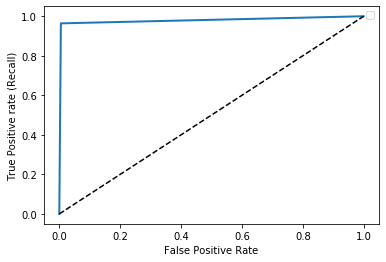

In [62]:
plot_roc_curve(fpr,tpr)
plt.show()

In [63]:
roc_auc_score(y_train_norm, y_score_forest)

0.9794179551615404

<h2>ROC_CURVE Graph for Decision Tree </h2>

In [65]:
y_score_tree=cross_val_predict(tree, X_train, y_train_norm, cv=10)

In [66]:
fpr1, tpr1,thresholds1 =roc_curve(y_train_norm,y_score_tree)

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr1,tpr1, linewidth=1, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate (Recall)")
    plt.legend(loc="upper right")
    


No handles with labels found to put in legend.


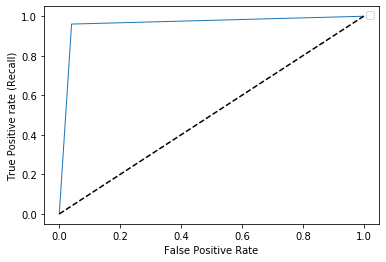

In [68]:
plot_roc_curve(fpr1,tpr1)
plt.show()

In [69]:
roc_auc_score(y_train_norm,y_score_tree)

0.960048640778575

<h2>Precision/Recall and F1-score using Classification Report</h2>

In [70]:
tree_class_report = classification_report(y_train_norm, y_score_tree)
forest_class_report =classification_report(y_train_norm, y_score_forest)

In [71]:
print(tree_class_report)

              precision    recall  f1-score   support

       False       0.77      0.96      0.86    110110
        True       0.99      0.96      0.98    775634

    accuracy                           0.96    885744
   macro avg       0.88      0.96      0.92    885744
weighted avg       0.97      0.96      0.96    885744



In [72]:
print(forest_class_report)

              precision    recall  f1-score   support

       False       0.80      0.99      0.88    110110
        True       1.00      0.96      0.98    775634

    accuracy                           0.97    885744
   macro avg       0.90      0.98      0.93    885744
weighted avg       0.97      0.97      0.97    885744



In [73]:
#Trying to use KMeans Unsupervised Learning Algorithm
# Since the data was labelled, we get good result using the supervised learning Algorithm 
#and with Classification techniques

In [74]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=3)
               
kmeans=kmeans.fit(X_train)

In [75]:
labels=kmeans.predict(X_train)

In [76]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [78]:
target_names=['impersonation', 'injection', 'normal']

In [79]:
print(classification_report(encoded_y, kmeans.labels_,target_names=target_names))

               precision    recall  f1-score   support

impersonation       0.11      1.00      0.20     44731
    injection       0.00      0.01      0.00     65379
       normal       0.82      0.18      0.30    775634

     accuracy                           0.21    885744
    macro avg       0.31      0.40      0.17    885744
 weighted avg       0.72      0.21      0.27    885744

